In [1]:
from svd import SVD
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = lambda t: t
y = lambda t: t
z = lambda t: t


t_min = 0
t_max = 10


num_points = 100

t_values = np.random.uniform(t_min, t_max, num_points)

noise_level = 1  # Уровень шума
X = x(t_values) + np.random.normal(0, noise_level, num_points)
Y = y(t_values) + np.random.normal(0, noise_level, num_points)
Z = z(t_values) + np.random.normal(0, noise_level, num_points)
data = np.stack((X, Y), axis=-1)
x_line = np.array([x(t_min), x(t_max)])
y_line = [y(t_min), y(t_max)]

/tmp/ipykernel_3228/131806919.py:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if x_line!=np.array([])and y_line!=np.array([]):


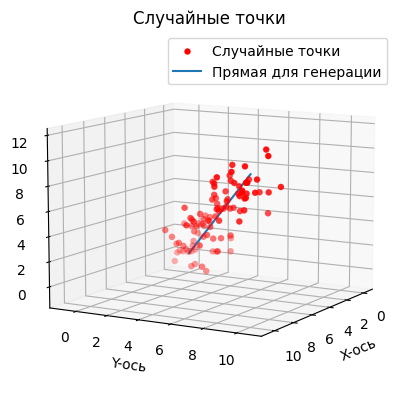

In [3]:
def show(xs, ys, zs, x_line=np.array([]), y_line = np.array([]), z_line = np.array([])):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if x_line!=np.array([])and y_line!=np.array([]):
        ax.plot(x_line, y_line, z_line, linestyle=':', linewidth=5, label="Предсказание")
    ax.scatter(xs, ys, zs, c="r", linewidth=0.1, label="Случайные точки")
    ax.plot([x(t_min), x(t_max)], [y(t_min), y(t_max)], [z(t_min), z(t_max)], label="Прямая для генерации")
    ax.legend()

    ax.set_xlabel('X-ось')
    ax.set_ylabel('Y-ось')
    ax.set_zlabel('Z-ось')
    ax.set_title('Случайные точки')
    ax.view_init(elev=10, azim=30)
    fig.show()
show(X, Y, Z)

/tmp/ipykernel_3228/131806919.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if x_line!=np.array([])and y_line!=np.array([]):


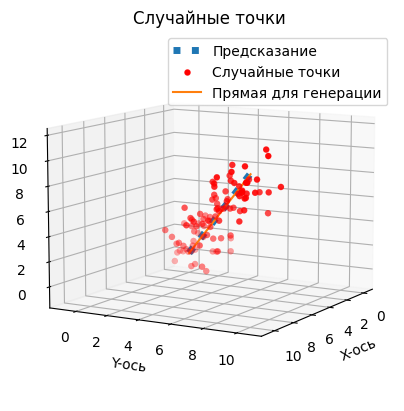

In [4]:
H1 = np.dot(data.T, data)
# H = np.linalg.inv(H1)
H = SVD(H1).psevdo_matrix
B = H.dot(np.dot(data.T, Z))
ml = lambda d: d.dot(B)
show(X, Y, Z, x_line, y_line, ml(np.stack((x_line, y_line), axis=-1)))

In [5]:
SVD(H1).psevdo_matrix, np.linalg.inv(H1)

(array([[ 0.00677135, -0.00664942],
        [-0.00664942,  0.00682961]]),
 array([[ 0.00677135, -0.00664942],
        [-0.00664942,  0.00682961]]))

In [6]:
H1 = np.dot(data.T, data)
H2 = SVD(H1).psevdo_matrix
B2 = H2.dot(np.dot(data.T, Z))

In [7]:
B, B2

(array([0.48666009, 0.51873665]), array([0.48666009, 0.51873665]))